# Conversation Visualization for Eliza Condition

This notebook is used to visualize the data processed in `convo_data_processing`. 

In [ ]:
fname = "/work/Results/Processed/Eliza_Convo_Processed_Data.csv"
fname_sv = "/work/Results/Processed/Eliza_Processed_Data.csv"

In [ ]:
!pip install statannotations


from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sys
sys.path.append('/work/Include/')
import stat_process



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb


In [ ]:
df = pd.read_csv(fname)
df

,Unnamed: 0,session_id,assigned_group,convo_agent,assigned_group_convo_agent,convo,preceeding_convo,turn,total_turn,sadness,...,textblob_subjectivity,vaderSentiment_neg,vaderSentiment_pos,vaderSentiment_neu,vaderSentiment_compound,Readability_ARI,Readability_FleschReadingEase,Readability_DaleChallIndex,Readability_Kincaid,Readability_GunningFogIndex
0,0,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,"I am Melu, a mental health companion. I have h...",NaN,1,61,0.023288,...,0.350000,0.198,0.173,0.628,-0.2551,16.648125,47.455000,10.651513,14.590000,20.3
1,1,2022-07-06T21:01:13.853Z,Manipulative Motive,Human,Manipulative Motive_Human,I have a friend in need of some mental health....,NaN,2,61,0.035620,...,0.200000,0.211,0.147,0.642,-0.3400,5.115625,84.845000,7.390725,5.400000,8.9
2,2,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,Can you elaborate on that ?,I have a friend in need of some mental health....,3,61,0.022278,...,1.000000,0.000,0.000,1.000,0.0000,0.852000,66.400000,7.042500,5.240000,10.0
3,3,2022-07-06T21:01:13.853Z,Manipulative Motive,Human,Manipulative Motive_Human,Her husband was napping and woke up to her son...,NaN,4,61,0.006142,...,0.000000,0.000,0.000,1.000,0.0000,6.564286,88.834286,6.933814,6.085714,8.4
4,4,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,What does that suggest to you ?,Her husband was napping and woke up to her son...,5,61,0.007522,...,0.000000,0.000,0.000,1.000,0.0000,0.410000,102.045000,6.565767,0.516667,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,2022-09-09T03:23:49.098Z,Caring Motive,AI,Caring Motive_AI,You are sure.,Yes!!!,97,101,0.000438,...,0.888889,0.000,0.535,0.465,0.3182,-4.230000,119.190000,0.000000,-2.620000,1.2
12202,12202,2022-09-09T03:23:49.098Z,Caring Motive,Human,Caring Motive_Human,Yes!!!!,NaN,98,101,0.019396,...,0.000000,0.000,1.000,0.000,0.5951,0.000000,0.000000,0.000000,0.000000,0.0
12203,12203,2022-09-09T03:23:49.098Z,Caring Motive,AI,Caring Motive_AI,I see.,Yes!!!!,99,101,0.033236,...,0.000000,0.000,0.000,1.000,0.0000,-11.010000,162.505000,0.000000,-8.910000,0.8
12204,12204,2022-09-09T03:23:49.098Z,Caring Motive,Human,Caring Motive_Human,Great!!,NaN,100,101,0.001238,...,0.750000,0.000,1.000,0.000,0.6892,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
def preProc(df):
    df.replace({"AI with caring motives":"Caring Motive",
            "AI with no motives":"No Motive",
            "AI with manipulative motives":"Manipulative Motive"}, inplace=True)

    name_dict = {"Caring motives":"Caring Motive",
                "No motive":"No Motive",
                "Manipulative/malicious motives":"Manipulative Motive"}
                
    stat_process.addProcessedCol(df, "From your own experience, what do you think the motive of the agent was?  Selected Choice", 
                    "Perceived Motives", name_dict)

    # aggregate UTAUT scores
    df['UTAUT Performance'] = df[['Agent: This agent would be useful in daily life',
                                'Agent: Using the agent would increase my chances of achieving things that are important to me', 
                                'Agent: Using the agent would help me accomplish things more quickly', 
                                'Agent: Using the agent would increase my productivity']].mean(axis=1)

    df['UTAUT Effort'] = df[['Agent: Learning how to talk to the agent was easy for me', 
                            'Agent: My interaction with the agent was clear and understandable', 
                            'Agent: The agent was easy to make use of', 
                            'Agent: It was easy for you to become skillful at making use of the agent']].mean(axis=1)

    df['UTAUT Hedonic'] = df[['Agent: Conversing with the agent is fun', 
                            'Agent: Conversing with the agent is enjoyable', 
                            'Agent: Conversing with the agent is entertaining']].mean(axis=1)

In [ ]:
df_sv = pd.read_csv(fname_sv)
preProc(df_sv)

df["Perceived Motives"] = ""
n = len(df.index)

for index, row in df.iterrows():
    df.at[index, "Perceived Motives"] = df_sv[df_sv['session_id'] == row['session_id']]['Perceived Motives'].tolist()[0]

In [ ]:
df

,Unnamed: 0,session_id,assigned_group,convo_agent,assigned_group_convo_agent,convo,preceeding_convo,turn,total_turn,sadness,...,vaderSentiment_neg,vaderSentiment_pos,vaderSentiment_neu,vaderSentiment_compound,Readability_ARI,Readability_FleschReadingEase,Readability_DaleChallIndex,Readability_Kincaid,Readability_GunningFogIndex,Perceived Motives
0,0,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,"I am Melu, a mental health companion. I have h...",NaN,1,61,0.023288,...,0.198,0.173,0.628,-0.2551,16.648125,47.455000,10.651513,14.590000,20.3,No Motive
1,1,2022-07-06T21:01:13.853Z,Manipulative Motive,Human,Manipulative Motive_Human,I have a friend in need of some mental health....,NaN,2,61,0.035620,...,0.211,0.147,0.642,-0.3400,5.115625,84.845000,7.390725,5.400000,8.9,No Motive
2,2,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,Can you elaborate on that ?,I have a friend in need of some mental health....,3,61,0.022278,...,0.000,0.000,1.000,0.0000,0.852000,66.400000,7.042500,5.240000,10.0,No Motive
3,3,2022-07-06T21:01:13.853Z,Manipulative Motive,Human,Manipulative Motive_Human,Her husband was napping and woke up to her son...,NaN,4,61,0.006142,...,0.000,0.000,1.000,0.0000,6.564286,88.834286,6.933814,6.085714,8.4,No Motive
4,4,2022-07-06T21:01:13.853Z,Manipulative Motive,AI,Manipulative Motive_AI,What does that suggest to you ?,Her husband was napping and woke up to her son...,5,61,0.007522,...,0.000,0.000,1.000,0.0000,0.410000,102.045000,6.565767,0.516667,2.4,No Motive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,2022-09-09T03:23:49.098Z,Caring Motive,AI,Caring Motive_AI,You are sure.,Yes!!!,97,101,0.000438,...,0.000,0.535,0.465,0.3182,-4.230000,119.190000,0.000000,-2.620000,1.2,Manipulative Motive
12202,12202,2022-09-09T03:23:49.098Z,Caring Motive,Human,Caring Motive_Human,Yes!!!!,NaN,98,101,0.019396,...,0.000,1.000,0.000,0.5951,0.000000,0.000000,0.000000,0.000000,0.0,Manipulative Motive
12203,12203,2022-09-09T03:23:49.098Z,Caring Motive,AI,Caring Motive_AI,I see.,Yes!!!!,99,101,0.033236,...,0.000,0.000,1.000,0.0000,-11.010000,162.505000,0.000000,-8.910000,0.8,Manipulative Motive
12204,12204,2022-09-09T03:23:49.098Z,Caring Motive,Human,Caring Motive_Human,Great!!,NaN,100,101,0.001238,...,0.000,1.000,0.000,0.6892,0.000000,0.000000,0.000000,0.000000,0.0,Manipulative Motive


In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])

Unnamed: 0
session_id
assigned_group
convo_agent
assigned_group_convo_agent
convo
preceeding_convo
turn
total_turn
sadness
joy
love
anger
fear
surprise
textblob_polarity
textblob_subjectivity
vaderSentiment_neg
vaderSentiment_pos
vaderSentiment_neu
vaderSentiment_compound
Readability_ARI
Readability_FleschReadingEase
Readability_DaleChallIndex
Readability_Kincaid
Readability_GunningFogIndex
Perceived Motives


## Conversation Length
Generate boxplots for distributions of length of conversations. 

15
17
110


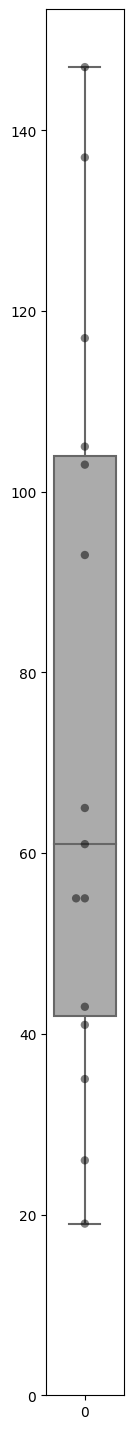

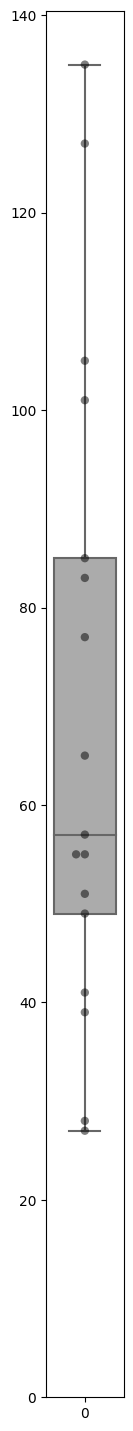

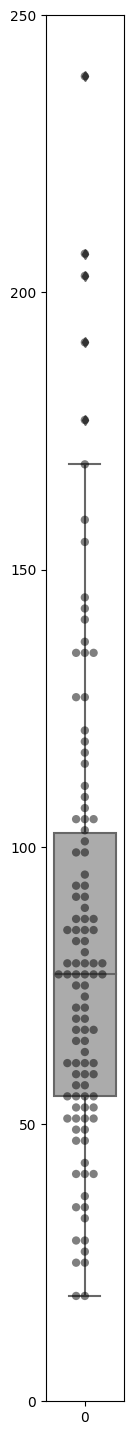

In [ ]:
turns_caring = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "Caring Motive"]
turns_manip = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "Manipulative Motive"]
turns_non = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "No Motive"]

ls_turns = [turns_caring, turns_manip, turns_non]

for trns in ls_turns: 
    print(len(trns))
    plt.figure(figsize = (1,18))
    ax = sns.boxplot(data=trns.values, color="#ababab")
    sns.swarmplot(data=trns.values, color="black", dodge=True, size=6, alpha=0.5, ax=ax)
    ax.set(ylim=(0, None))

# Conversation Trend Analysis

Generate figures for sentiment trends.

In [ ]:
caring_motive_df = df[df["assigned_group"] == "Caring Motive"] 
manipulative_motive_df = df[df["assigned_group"] == "Manipulative Motive"] 
no_motive_df = df[df["assigned_group"] == "No Motive"]

datalist = [(caring_motive_df, "Caring"), (manipulative_motive_df, "Manipulative"), (no_motive_df, "No Motive")]

In [ ]:
prc_caring_motive_df = df[df["Perceived Motives"] == "Caring Motive"] 
prc_manipulative_motive_df = df[df["Perceived Motives"] == "Manipulative Motive"] 
prc_no_motive_df = df[df["Perceived Motives"] == "No Motive"]

# datalist = [(df, "Overall"), (prc_caring_motive_df, "Caring"), (prc_manipulative_motive_df, "Manipulative"), (prc_no_motive_df, "No Motive")]
prc_datalist = [(prc_caring_motive_df, "Caring"), (prc_manipulative_motive_df, "Manipulative"), (prc_no_motive_df, "No Motive")]

#### Assigned Motives

In [ ]:
sns.set_style("white")

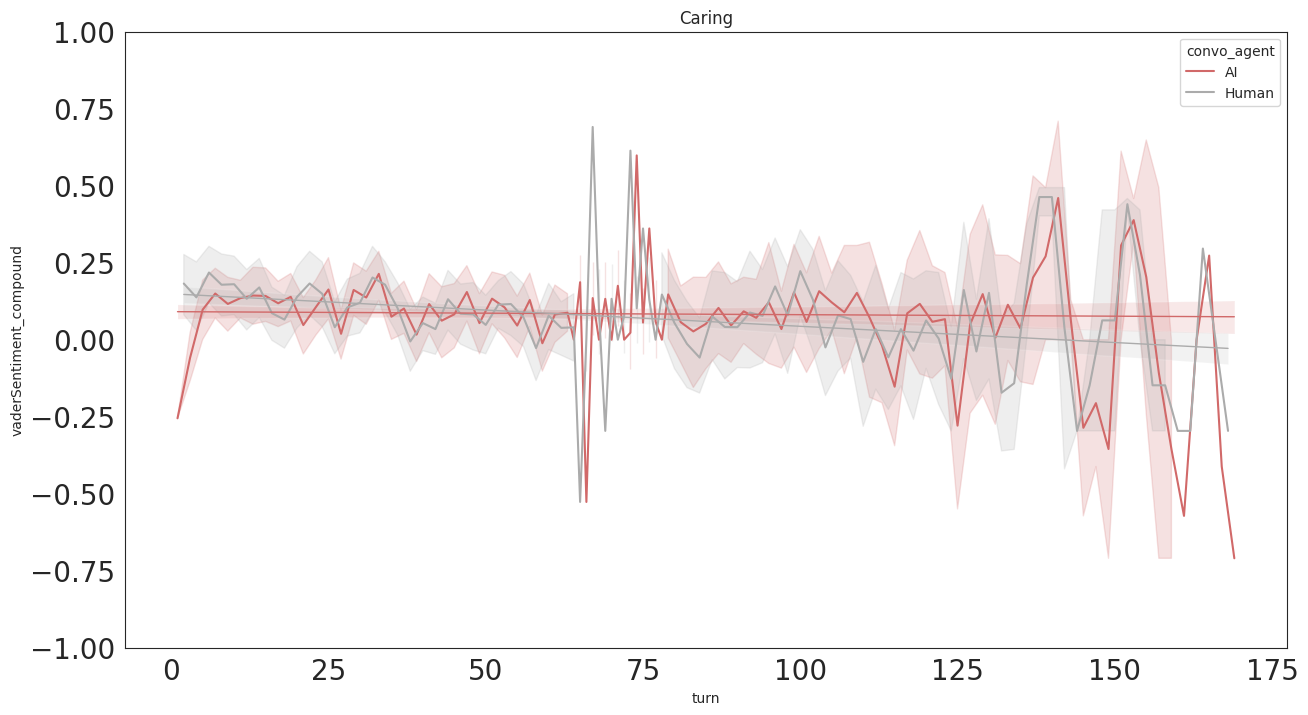

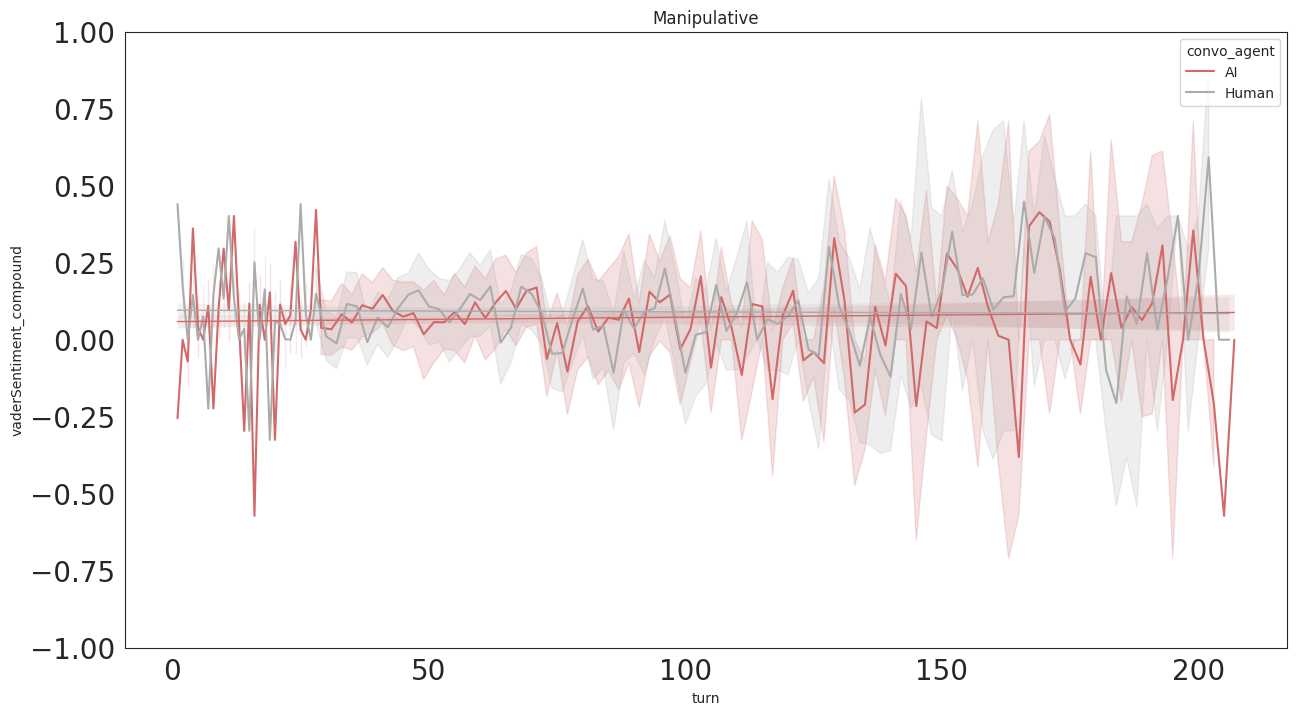

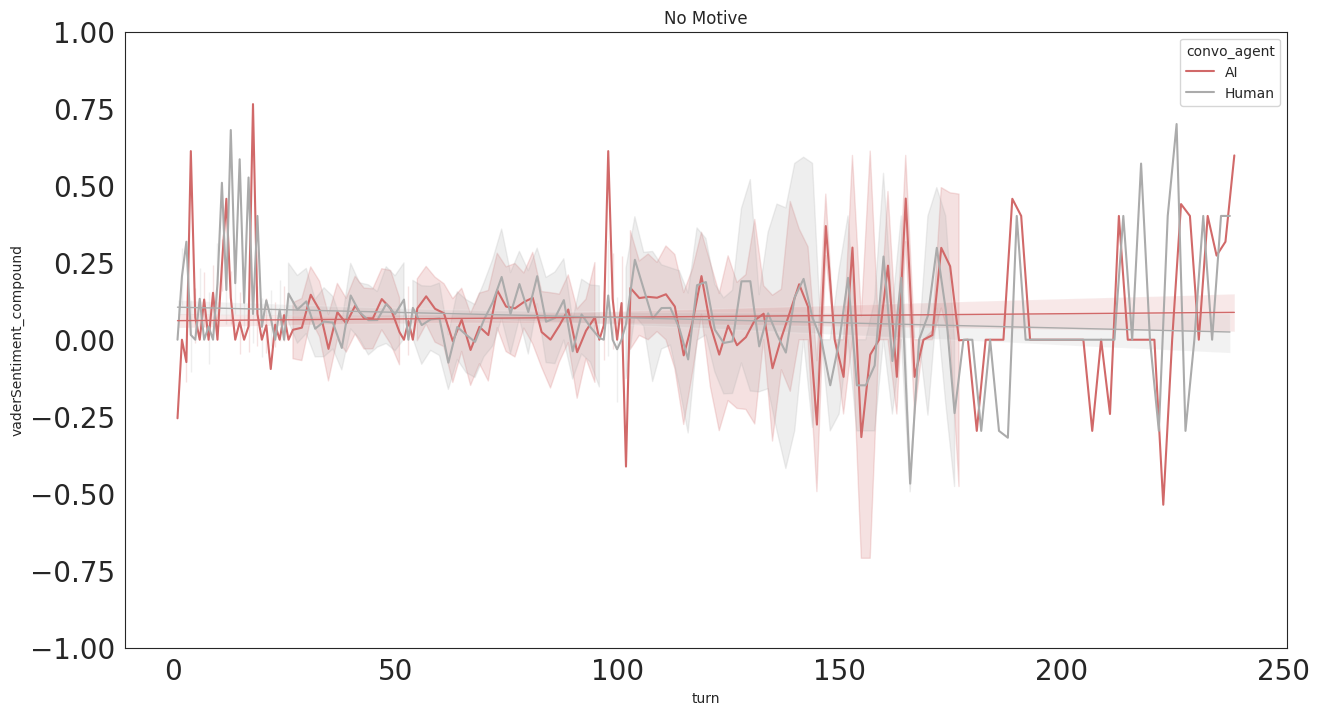

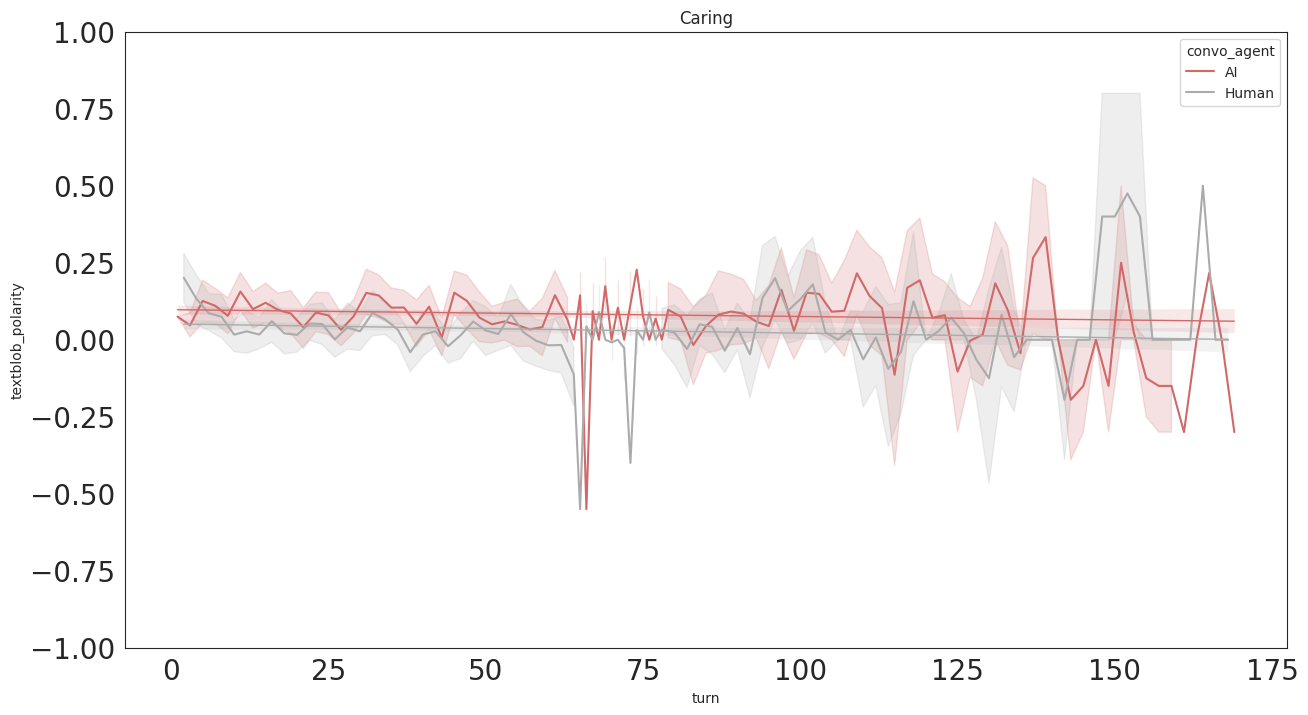

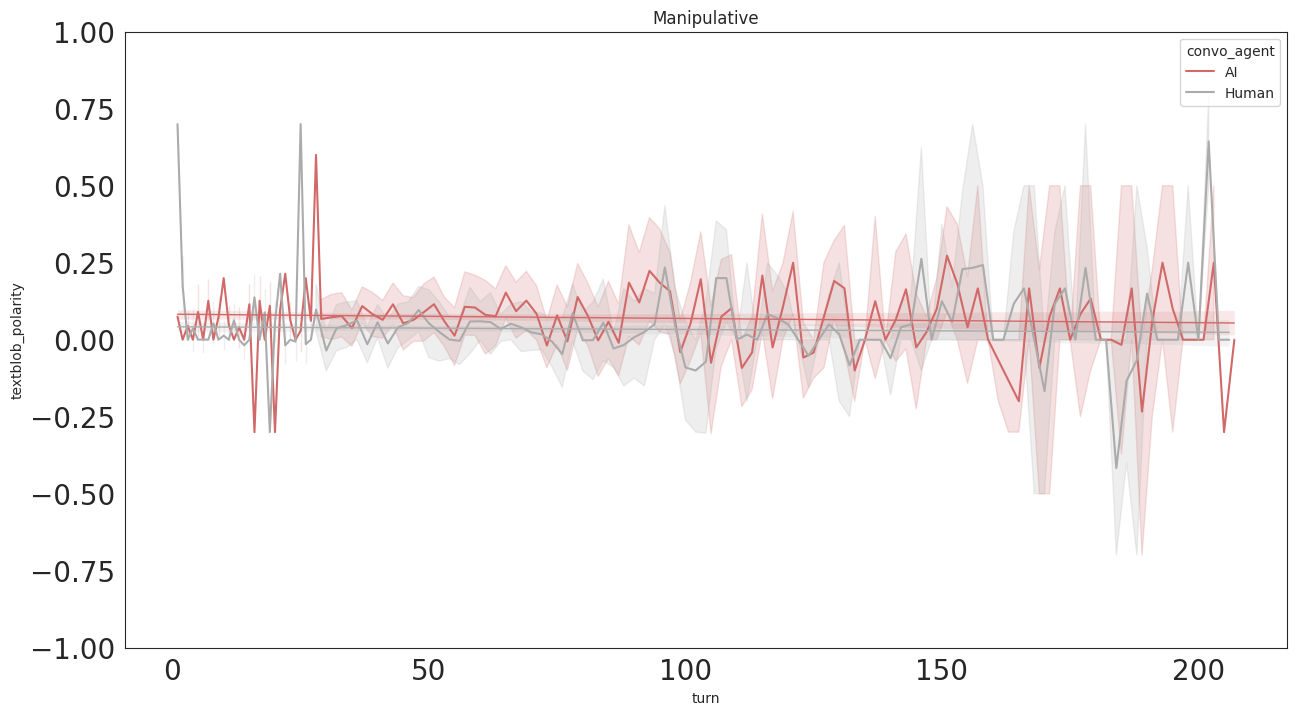

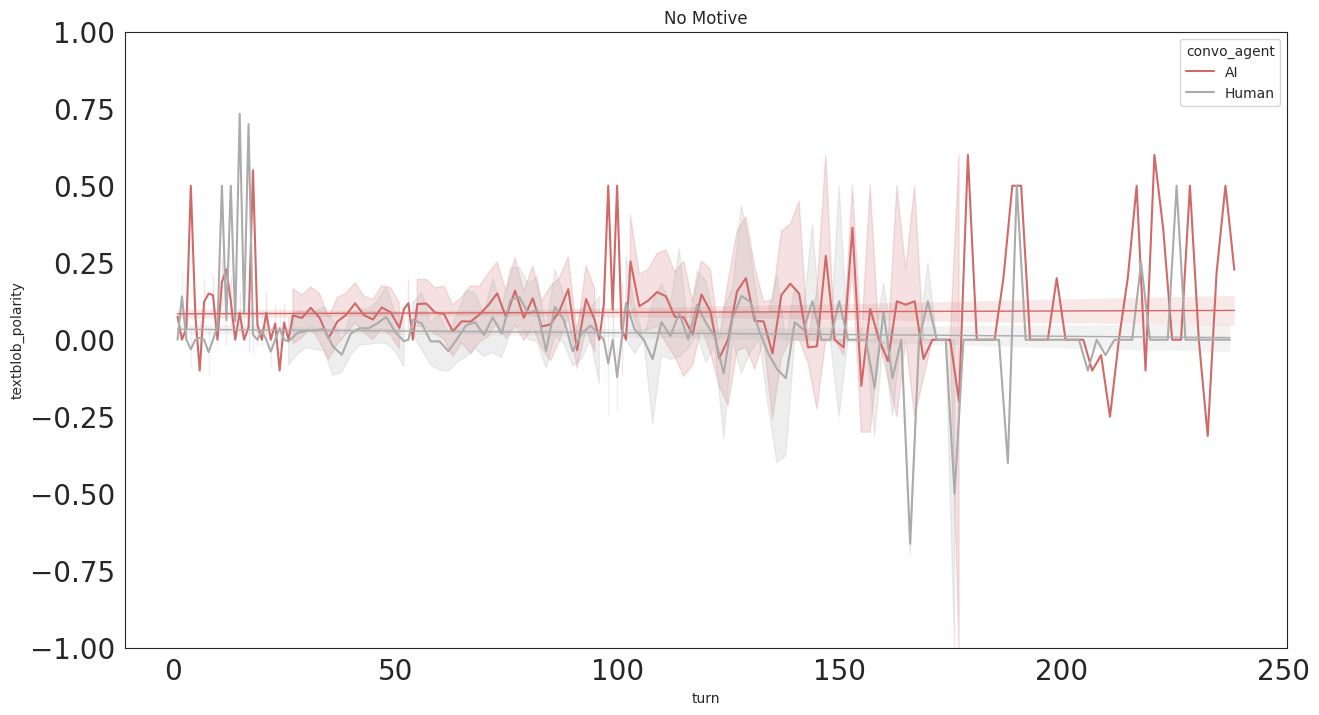

In [ ]:
# ASSIGNED - ELIZA

ylist = ["vaderSentiment_compound", "textblob_polarity"] 
#        "Readability_GunningFogIndex", "Readability_ARI", 
#        "Readability_FleschReadingEase"]

for y in ylist: 
    for item in datalist: 
        x = "turn"
        hue = "convo_agent"
        hue_order=['AI', 'Human']
        my_pal = {"AI": "#d16969", "Human": "#ababab"}
        dataf = item[0]
        name = item[1]
        plt.rc('xtick', labelsize=20) 
        plt.rc('ytick', labelsize=20) 
        plt.figure(figsize = (15,8))
        plt.ylim(-1,1)
        ax = sns.lineplot(data=dataf, x=x, y=y,  hue=hue, hue_order=hue_order, palette=my_pal)
        ax.set_title(name)
        #ax.get_legend().remove()
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='AI'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#d16969"})
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='Human'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#ababab"})

    

In [ ]:
# ASSIGNED - ELIZA - stat values

ylist = ["vaderSentiment_compound"]

for y in ylist: 
    for item in datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        x = dataf["turn"]
        yi = dataf[y]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
Slope: -0.0005644991692446322, r value: -0.05674507087947253, p-value: 0.000172846317317723, std err: 0.0001501742362859464
Manipulative
Slope: 4.7986082280867576e-05, r value: 0.006134738777831686, p-value: 0.7083696848778278, std err: 0.00012827923292358588
No Motive
Slope: -0.00010854055367415743, r value: -0.013484636935381485, p-value: 0.38744138787377547, std err: 0.00012557352009839344


In [ ]:
# ASSIGNED - ELIZA - stat values - textBlob

ylist = ["textblob_polarity"]

for y in ylist: 
    for item in datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        x = dataf["turn"]
        yi = dataf[y]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
Slope: -0.00026113624024179773, r value: -0.03601392756901029, p-value: 0.017197314372572357, std err: 0.00010956590932188903
Manipulative
Slope: -0.00011466790706558537, r value: -0.020333555139955387, p-value: 0.21501550237842756, std err: 9.246642701740858e-05
No Motive
Slope: -3.441753683496028e-05, r value: -0.005961309068929357, p-value: 0.7024150899240189, std err: 9.007726944133369e-05


#### Perceived Motives

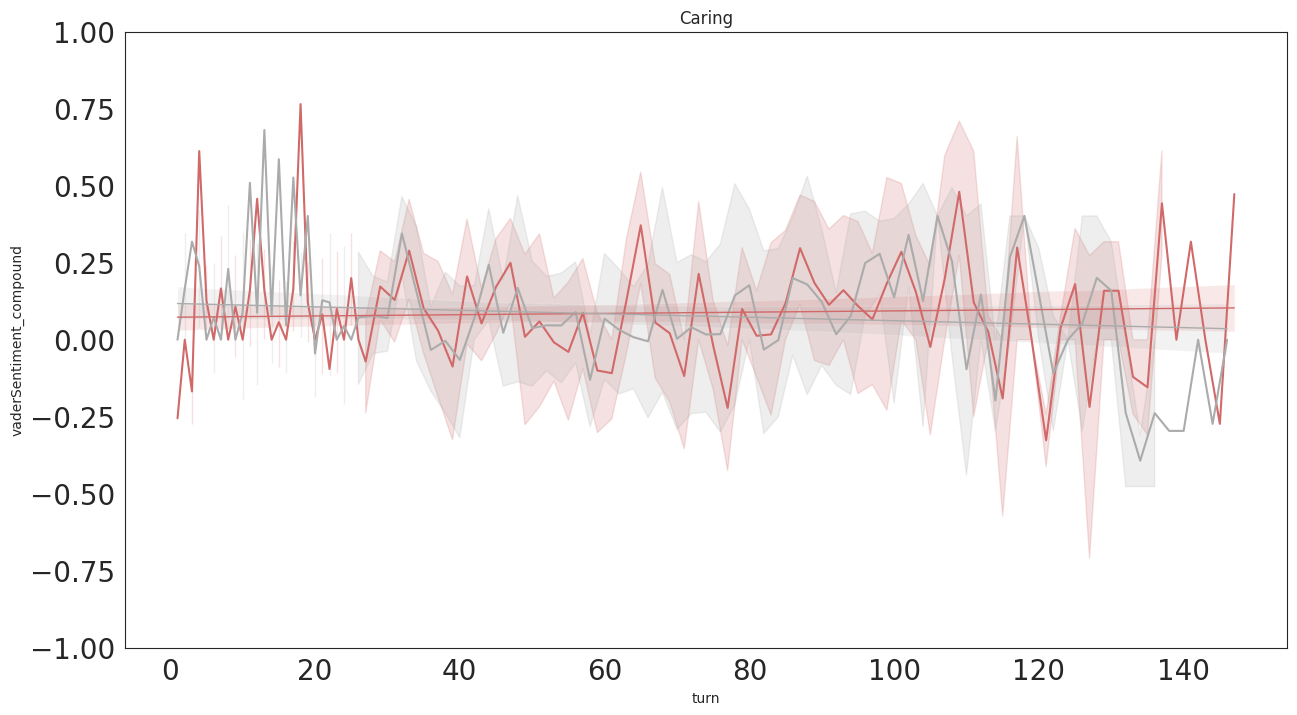

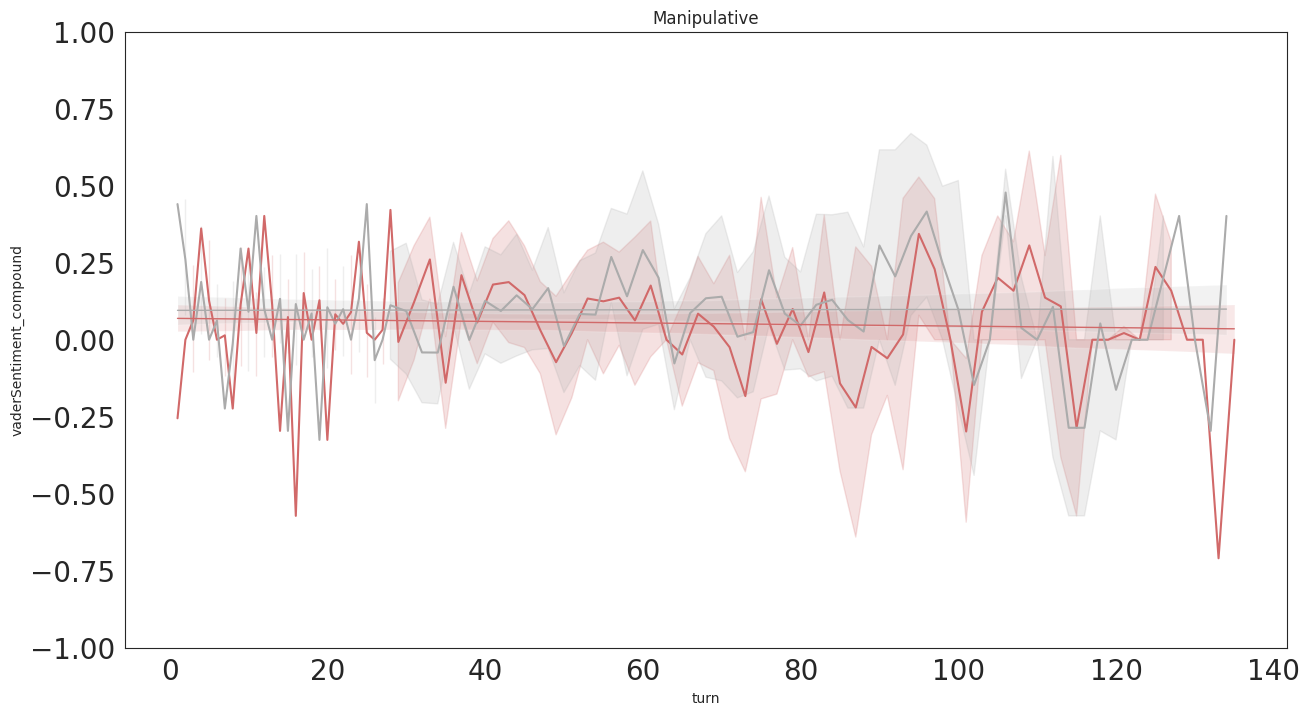

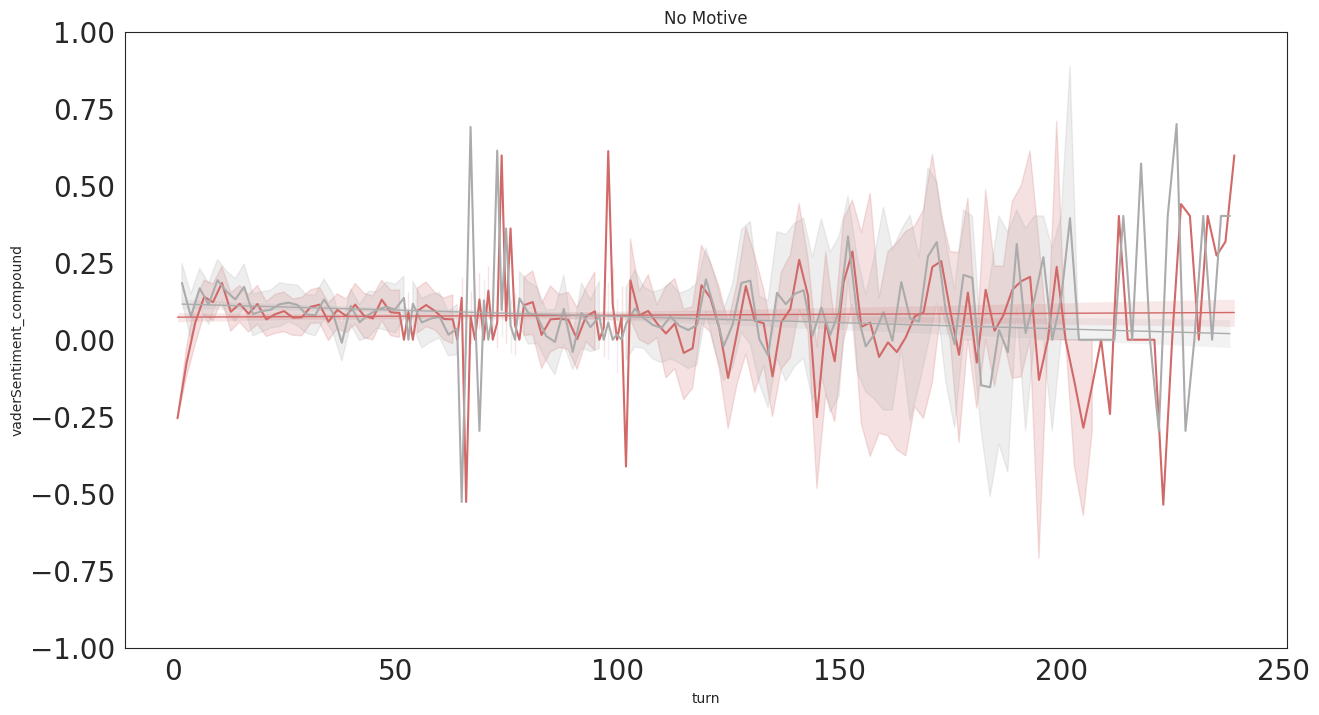

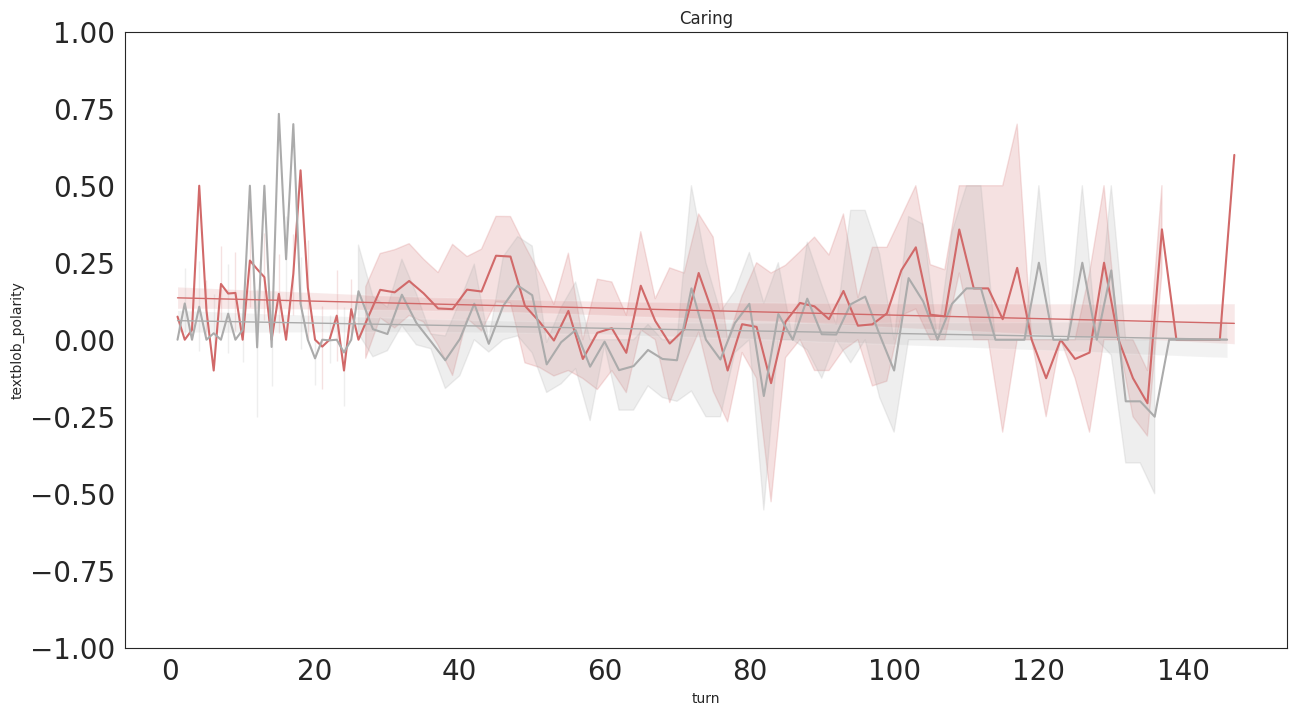

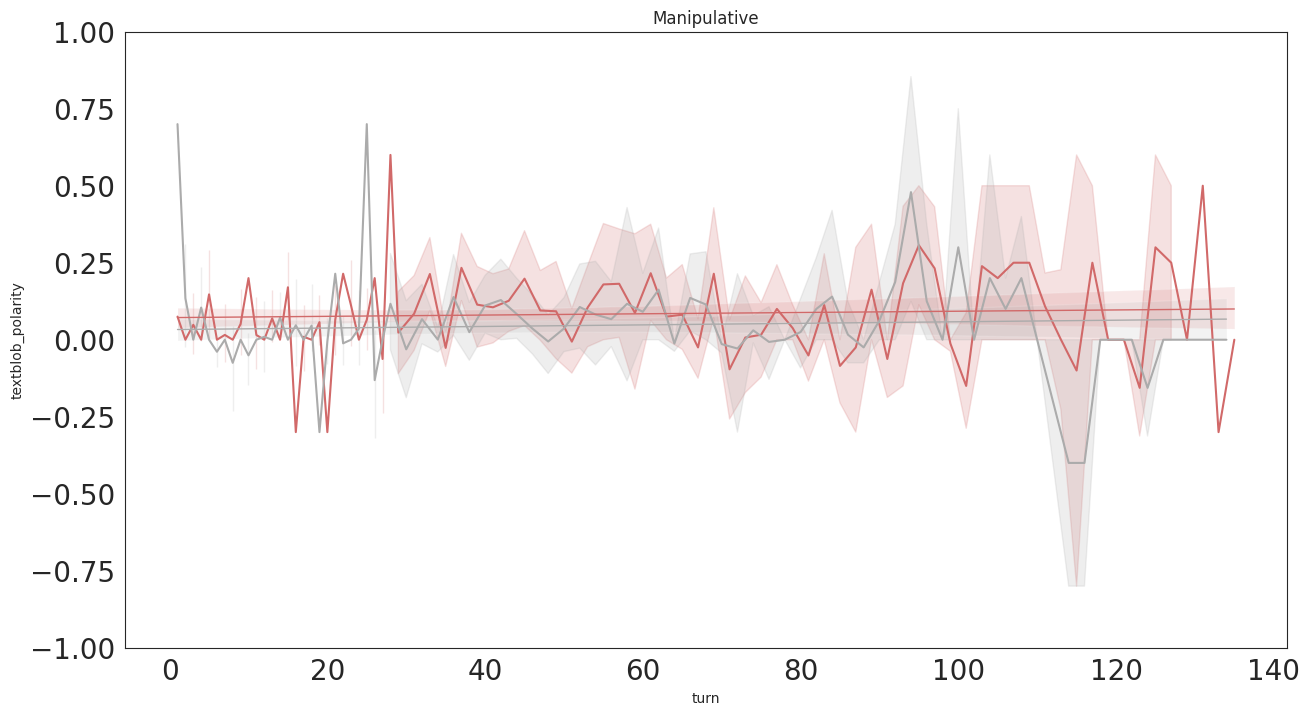

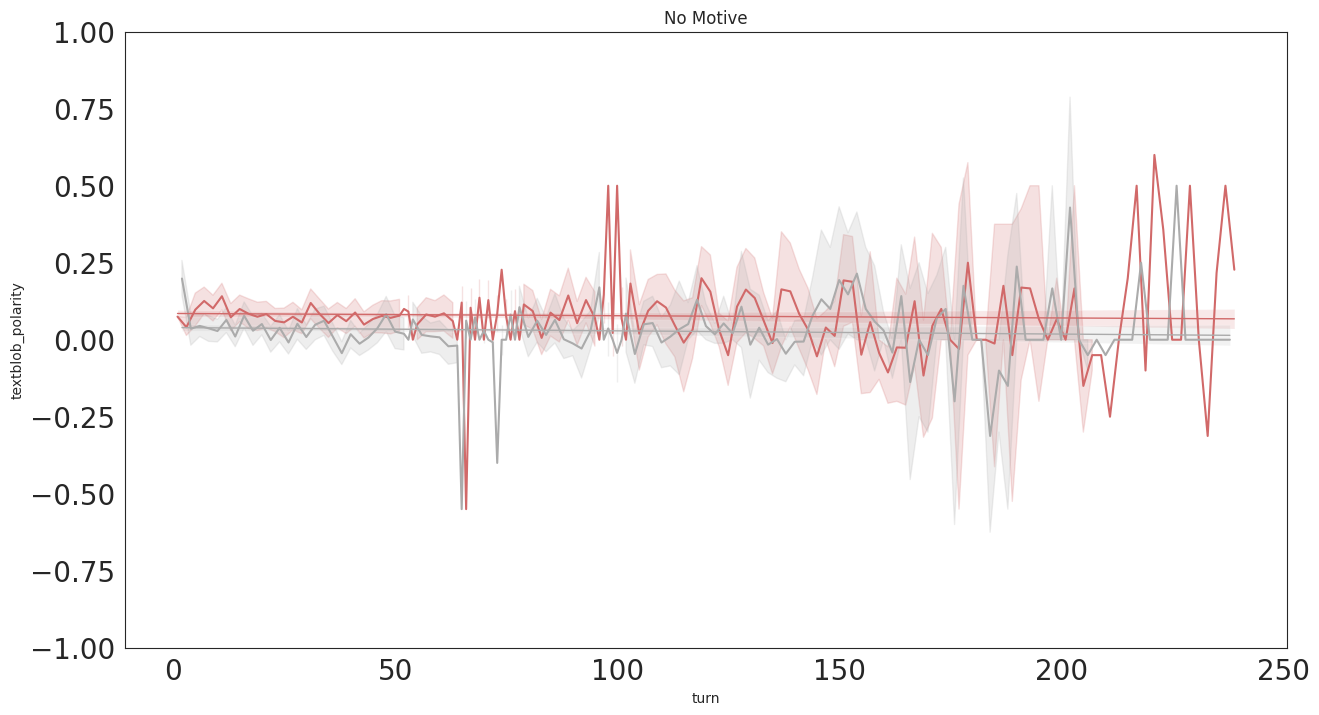

In [ ]:
# PERCEIVED - ELIZA

ylist = ["vaderSentiment_compound", "textblob_polarity"]

for y in ylist: 
    for item in prc_datalist: 
        x = "turn"
        hue = "convo_agent"
        hue_order=['AI', 'Human']
        my_pal = {"AI": "#d16969", "Human": "#ababab"}
        dataf = item[0]
        name = item[1]
        plt.rc('xtick', labelsize=20) 
        plt.rc('ytick', labelsize=20) 
        plt.figure(figsize = (15,8))
        plt.ylim(-1,1)
        ax = sns.lineplot(data=dataf, x=x, y=y,  hue=hue, hue_order=hue_order, palette=my_pal)
        ax.set_title(name)
        ax.get_legend().remove()
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='AI'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#d16969"})
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='Human'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#ababab"})

    

In [ ]:
# PERCEIVED - ELIZA - stat values

ylist = ["vaderSentiment_compound"]

for y in ylist: 
    for item in prc_datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        
        for speaker in ['AI', 'Human']:
            x = dataf[dataf['convo_agent']==speaker]["turn"]
            yi = dataf[dataf['convo_agent']==speaker][y]
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

            print(speaker + ": " + "slope = $" + str(slope) + 
                " \pm " + str(std_err) + "$, r = " + str(r_value) + ", p = " + str(p_value))

        #x = dataf["turn"]
        #yi = dataf[y]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        #print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
AI: slope = $0.00020619110452660028 \pm 0.0003804062235079141$, r = 0.022981067781340448, p = 0.5880158653179011
Human: slope = $-0.0005627604965687177 \pm 0.00042831989432742654$, r = -0.05634627313492816, p = 0.18944276919696024
Manipulative
AI: slope = $-0.0002528374061011217 \pm 0.0004269309472305486$, r = -0.024251176546736964, p = 0.5539273090277177
Human: slope = $3.0481182620139627e-05 \pm 0.0004599571697387671$, r = 0.0027516853963947207, p = 0.9471860131935773
No Motive
AI: slope = $6.306309954835743e-05 \pm 0.0001167338374772802$, r = 0.007926328140032982, p = 0.5890644525735649
Human: slope = $-0.00040651152173807215 \pm 0.00012358081076921956$, r = -0.04878829960712564, p = 0.0010115370253459873


In [ ]:
# PERCEIVED - ELIZA - stat values - textBlob

ylist = ["textblob_polarity"]

for y in ylist: 
    for item in prc_datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        
        for speaker in ['AI', 'Human']:
            x = dataf[dataf['convo_agent']==speaker]["turn"]
            yi = dataf[dataf['convo_agent']==speaker][y]
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

            print(speaker + ": " + "slope = $" + str(slope) + 
                " \pm " + str(std_err) + "$, r = " + str(r_value) + ", p = " + str(p_value))

Caring
AI: slope = $-0.0005676161681982005 \pm 0.000300893410078905$, r = -0.07974790410647527, p = 0.05975707582795774
Human: slope = $-0.00041952786709912075 \pm 0.0002970882669949725$, r = -0.060544990051455284, p = 0.15848495560299847
Manipulative
AI: slope = $0.0002076043844559552 \pm 0.0003263906526457381$, r = 0.026045237734665556, p = 0.5249807968582016
Human: slope = $0.0002536755424577389 \pm 0.00033378421250526415$, r = 0.031541523700558335, p = 0.44756421318888107
No Motive
AI: slope = $-7.287240807493812e-05 \pm 8.524192448537358e-05$, r = -0.012542463704284296, p = 0.39265653175670245
Human: slope = $-0.00010562717775619384 \pm 8.582776758696952e-05$, r = -0.018272025955089474, p = 0.21850351752047958


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f3ea62d-9e62-461e-8c65-1caf654509ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>